# Volatility Surface: Theory & Practice

Exercise 3 (Implementation): Plot a 3D implied volatility surface using the provided dataset.
 The objective of this exercise is to derive the implied volatility surface mathematically and show under
 what conditions it is uniquely defined

 This section focuses on applying the theory using real market data. The objective is to use the SP500.csv file attached to plot a 3D volatility surface.<br>
 <br>
 Dataset Description:<br>
 • The file contains implied volatilities for SP500 options.<br>
 • Columns:<br>
 – Date → snapshot date (format YYYYMMDD)<br>
 – T →maturity in days (e.g., 29D, 60D, etc.)<br>
 – Moneyness levels as columns (0.8, 0.9, 1.o, etc.)<br>
 <br>
 Task:
 1. Load the dataset and select one snapshot date.
 2. Convert maturities (T) from days to year fractions.
 3. Prepare a grid of moneyness vs maturity for plotting.
 4. Create a 3D surface plot where:– X-axis = Moneyness (K
 F),– Y-axis = Maturity (years),– Z-axis = Implied Volatility.
 The expected output is a 3D plot showing a smooth volatility surface where axes must be labeled
 clearly.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [93]:
 #--- Step 1: Load the data--
df = pd.read_csv("SP500.csv")
display(df)


,T,0.8,0.9,0.95,0.975,1,1.025,1.05,1.1,1.2,Date
0,29D,0.354,0.225,0.156,0.122,0.090,0.075,0.090,0.130,0.215,20180928
1,60D,0.288,0.195,0.148,0.125,0.103,0.085,0.082,0.102,0.152,20180928
2,90D,0.258,0.185,0.149,0.130,0.112,0.095,0.086,0.094,0.134,20180928
3,180D,0.232,0.180,0.153,0.140,0.126,0.113,0.101,0.092,0.115,20180928
4,360D,0.217,0.181,0.162,0.153,0.143,0.133,0.124,0.109,0.100,20180928
...,...,...,...,...,...,...,...,...,...,...,...
135,90D,0.235,0.170,0.135,0.116,0.097,0.080,0.073,0.093,0.127,20170929
136,180D,0.217,0.169,0.144,0.130,0.116,0.103,0.092,0.086,0.109,20170929
137,360D,0.208,0.173,0.155,0.146,0.136,0.127,0.119,0.104,0.099,20170929
138,540D,0.202,0.174,0.160,0.153,0.146,0.139,0.132,0.120,0.106,20170929


In [94]:
#--- Step 2: Filter to one date (fill this in)--

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
snap_date = df['Date'].max()
snap = df[df['Date'] == snap_date].copy()

display(snap)

,T,0.8,0.9,0.95,0.975,1,1.025,1.05,1.1,1.2,Date
105,29D,0.409,0.326,0.295,0.278,0.260,0.242,0.228,0.215,0.233,2022-06-30
106,60D,0.372,0.313,0.286,0.271,0.255,0.238,0.225,0.207,0.207,2022-06-30
107,90D,0.353,0.305,0.281,0.268,0.253,0.239,0.226,0.208,0.197,2022-06-30
108,180D,0.331,0.293,0.273,0.263,0.252,0.241,0.231,0.214,0.192,2022-06-30
109,360D,0.310,0.280,0.264,0.256,0.248,0.239,0.232,0.217,0.195,2022-06-30
110,540D,0.297,0.272,0.258,0.250,0.242,0.235,0.227,0.215,0.197,2022-06-30
111,720D,0.292,0.267,0.253,0.246,0.237,0.230,0.223,0.213,0.202,2022-06-30


In [95]:
#--- Step 3: Convert T from "29D" format to years (fill this in)--
def days_to_years(x):
    y = float(x[:-1]) / 360
    return y

snap["T_years"] = snap["T"].apply(days_to_years)
snap = snap[['T_years','0.8','0.9','0.95','0.975','1','1.025','1.05','1.1','1.2']]
display(snap)

,T_years,0.8,0.9,0.95,0.975,1,1.025,1.05,1.1,1.2
105,0.081,0.409,0.326,0.295,0.278,0.260,0.242,0.228,0.215,0.233
106,0.167,0.372,0.313,0.286,0.271,0.255,0.238,0.225,0.207,0.207
107,0.250,0.353,0.305,0.281,0.268,0.253,0.239,0.226,0.208,0.197
108,0.500,0.331,0.293,0.273,0.263,0.252,0.241,0.231,0.214,0.192
109,1.000,0.310,0.280,0.264,0.256,0.248,0.239,0.232,0.217,0.195
110,1.500,0.297,0.272,0.258,0.250,0.242,0.235,0.227,0.215,0.197
111,2.000,0.292,0.267,0.253,0.246,0.237,0.230,0.223,0.213,0.202


,0.8,0.9,0.95,0.975,1,1.025,1.05,1.1,1.2
T_years,,,,,,,,,
0.081,0.409,0.326,0.295,0.278,0.260,0.242,0.228,0.215,0.233
0.167,0.372,0.313,0.286,0.271,0.255,0.238,0.225,0.207,0.207
0.250,0.353,0.305,0.281,0.268,0.253,0.239,0.226,0.208,0.197
0.500,0.331,0.293,0.273,0.263,0.252,0.241,0.231,0.214,0.192
1.000,0.310,0.280,0.264,0.256,0.248,0.239,0.232,0.217,0.195
1.500,0.297,0.272,0.258,0.250,0.242,0.235,0.227,0.215,0.197
2.000,0.292,0.267,0.253,0.246,0.237,0.230,0.223,0.213,0.202


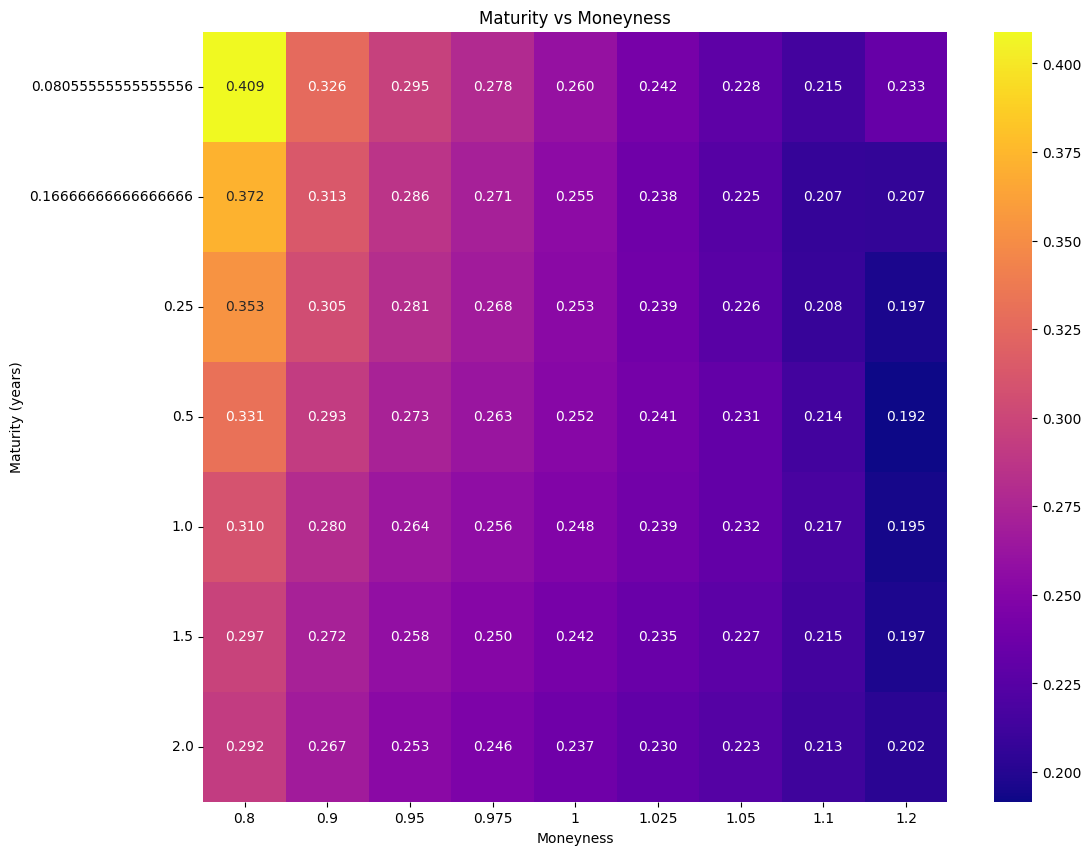

In [96]:
 #--- Step 4: Build pivot table of maturity vs moneyness--
pivot = snap.pivot_table(index='T_years')

display(pivot)

plt.figure(figsize=(12, 10))
sbn.heatmap(pivot,cmap='plasma', annot=True, fmt='.3f')
plt.title('Maturity vs Moneyness')
plt.xlabel('Moneyness')
plt.ylabel('Maturity (years)')
plt.show()

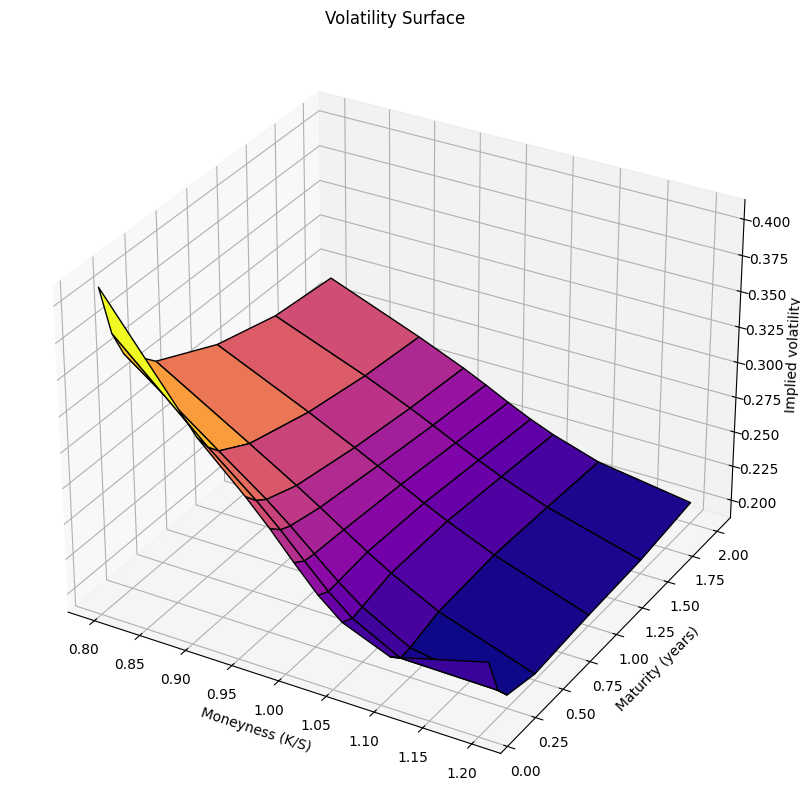

In [97]:
 #--- Step 5: Create mesh grid and plot surface--

# KK = moneyness (x axis), TT = maturity (y axis)
KK, TT = np.meshgrid(pivot.columns.astype(float), pivot.index.values)

# VV = implied volatility (z axis)
VV = pivot.values


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(KK, TT, VV, cmap='plasma', edgecolor='black')

ax.set_xlabel('Moneyness (K/S)')
ax.set_ylabel('Maturity (years)')
ax.set_zlabel('Implied volatility')
ax.set_title('Volatility Surface')

plt.show()